_LEARNING-CIRCLE-24 PROJECT_

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<h2> Learning-Circle-24 </h2> <p>  Contributors </p>



# **Crime in Chicago**
This is a dataset
The data dictionary can be found in [Chicago Crime Portal](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2/about_data)

In this notebook, we are going to explore more about crime in Chicago and try to answer few questions.

Analyzing the Chicago crime dataset involves examining various aspects of the data to understand patterns, trends, and characteristics of criminal activities in Chicago. We perform analysis using Python, pandas and visualization libraries using the following steps:

1. Load the Dataset: Load the Chicago crime dataset into a DataFrame.
2. Explore the Dataset: Examine the structure, columns, and basic statistics of the dataset.
3. Data Preprocessing: We cleaned the data by dropping redundant columns,handling missing values and converting columns to their appropriate format.
4. Feature Engineering: Create new column for Months, Day, Season
5. EDA: Exploratory Data Analysis
    - What is the total number of crime cases filed from 2001 till date?
    - How many unique crimes are available and what is the count for each crime from 2001-2023?
    - what is the number of crime per year?
    - What is the number of crime per month?
    - Top 10 number of cases discovered each day?
    - What is the trend of crime by type?
    - Where does crimes happen the most?
    - What is the number of crime discovered by month and year?
    - Are there specific location that crimes used to happen?
    - What is the arrested rate per crime?
    - Top 10 Block with the most crime?
    - Top 10 ward with most amount of crimes?
    - Top 10 community area with the most amount of crimes?
    - Top 10 communities with the most crime in 2023?
    - Top 10 Location where theft normally occurs?
    - Top-15 crime where arrest occured?
    - How has crime in Chicago changed across years? Was 2023 really the bloodiest year in two decades?
    - Are some types of crimes more likely to happen in specific locations or specific time of the day or specific day of the week than other types of        crimes?
    - In which month did the lowest motor vehicle thefts occur?
    - How prominant are certain types of various crimes?
    - How do rates of crime change of time? For instance, are there any seasonal effects or changes depending on the time ofday?
    - Where do these crimes occur? Are some areas more safe than others?
6. Summarize and Visualize Insights: Summarize and Visualize the key insights and findings from the analysis using plots and charts.

In [ ]:
# importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

In [ ]:
# Set display option
pd.set_option('display.max.columns', None)

# 1. Loading the dataset

This dataset contains crime cases from 2001 till date, but we want the data for only cases from 2001 to 2023 to avoid a bias analysis.

In [ ]:
full_dataset = pd.read_csv('/content/drive/MyDrive/datasets/Crimes_-_2001_to_Present_20240323.csv')
# Drop rows that have 2024 as the year.
chicago_crime_df = pd.DataFrame(full_dataset[full_dataset['Year'] != 2024])
chicago_crime_df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11037294,JA371270,03/18/2015 12:00:00 PM,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,111,1.0,42.0,32.0,11,NaN,NaN,2015,08/01/2017 03:52:26 PM,NaN,NaN,NaN
1,11646293,JC213749,12/20/2018 03:00:00 PM,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,2515,25.0,36.0,19.0,11,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,824,8.0,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,11645959,JC211511,12/20/2018 04:00:00 PM,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1724,17.0,33.0,14.0,08A,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
4,11645601,JC212935,06/01/2014 12:01:00 AM,087XX S SANGAMON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,2222,22.0,21.0,71.0,11,NaN,NaN,2014,04/06/2019 04:04:43 PM,NaN,NaN,NaN


# 2. Explore the dataset

In [ ]:
#checking the dimension of the dataset
chicago_crime_df.shape

(7975860, 22)

In [ ]:
# Display the first five rows of the dataset
chicago_crime_df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [ ]:
# check the first five observations
chicago_crime_df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11037294,JA371270,03/18/2015 12:00:00 PM,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,111,1.0,42.0,32.0,11,NaN,NaN,2015,08/01/2017 03:52:26 PM,NaN,NaN,NaN
1,11646293,JC213749,12/20/2018 03:00:00 PM,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,2515,25.0,36.0,19.0,11,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,824,8.0,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,11645959,JC211511,12/20/2018 04:00:00 PM,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1724,17.0,33.0,14.0,08A,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
4,11645601,JC212935,06/01/2014 12:01:00 AM,087XX S SANGAMON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,2222,22.0,21.0,71.0,11,NaN,NaN,2014,04/06/2019 04:04:43 PM,NaN,NaN,NaN


In [ ]:
 # Display column information and data types
chicago_crime_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7975860 entries, 0 to 8023396
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

In [ ]:
# checking missing value count
chicago_crime_df.isnull().sum()

ID                           0
Case Number                  0
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     12560
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614853
Community Area          613477
FBI Code                     0
X Coordinate             88293
Y Coordinate             88293
Year                         0
Updated On                   0
Latitude                 88293
Longitude                88293
Location                 88293
dtype: int64

In [ ]:
chicago_crime_df.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,7.975860e+06,7.975860e+06,7.975813e+06,7.361007e+06,7.362383e+06,7.887567e+06,7.887567e+06,7.975860e+06,7.887567e+06,7.887567e+06
mean,7.173333e+06,1.185298e+03,1.129651e+01,2.276418e+01,3.744889e+01,1.164612e+06,1.885823e+06,2.010256e+03,4.184229e+01,-8.767145e+01
std,3.586638e+06,7.033946e+02,6.956784e+00,1.385371e+01,2.154384e+01,1.699183e+04,3.248020e+04,6.497540e+00,8.936661e-02,6.156043e-02
min,6.340000e+02,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.001000e+03,3.661945e+01,-9.168657e+01
25%,3.863385e+06,6.210000e+02,6.000000e+00,1.000000e+01,2.300000e+01,1.153000e+06,1.859111e+06,2.005000e+03,4.176877e+01,-8.771359e+01
50%,7.171178e+06,1.034000e+03,1.000000e+01,2.300000e+01,3.200000e+01,1.166140e+06,1.890786e+06,2.009000e+03,4.185606e+01,-8.766577e+01
75%,1.037155e+07,1.731000e+03,1.700000e+01,3.400000e+01,5.700000e+01,1.176389e+06,1.909326e+06,2.015000e+03,4.190690e+01,-8.762814e+01
max,1.340568e+07,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,1.951622e+06,2.023000e+03,4.202291e+01,-8.752453e+01


# 3. Data Preprocessing

**Data Cleaning**

Here are some steps that we would carry out in this phase

1. Remove redundant or unnecessary columns
2. Handle missing values
3. Convert data types to the appropriate formats  

__Reasons for dropping the below columns__
- 'Unnamed: 0': Its just an index for individual row
- 'ID': Serial identifier for the record which is redundant due to the presence of a case number for each case.
- 'Location': This is where the incident occurred in a format that allows for creation of maps and other geographic operation. It's the combination of both latitude and longitude feature of this dataset thus, not required.
- 'Updated On': Holds the date and time the record was last updated.Which is not required for our analysis.
- 'X Coordinate': The x coordinate is a shifted location from the actual location for partial redaction but falls on the same block. Since we have a longitude/latitude and the block where the crime happened, we can neglect this feature.
- 'Y Coordinate': The y coordinate is a shifted location from the actual location for partial redaction but falls on the same block. Since we have a longitude/latitude and the block where the crime happened, we can neglect this feature.
- 'Community Area': This indicates the community area where the incident occurred. Which is not neccessary for our analysis.
- 'IUCR': This is the Illinois Unifrom Crime Reporting code. This is directly linked to the Primary Type and Description, it provides information about the primary type and description of crime. Since primary type and description features already exist, it becomes a redundant column
- Description: It's simply a subcategory of the primary type(which describes the type of crime committed). this can be omitted
- Block: Since we have the latitude and longitude, this column is redundant.
- Community Area: This is not needed in our analysis and the presence of a police Beat makes this redundant.
- FBI Code: Removed because it is not necessary for our analysis as we are unable to de-code these codes.

__1. Use a funtion to Drop redundant columns and/or columns that are not necessary for our analysis (a redundant column is one that gives infomation that another column already explains: eg ID and Case number)__

In [ ]:
chicago_crime_df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [ ]:
# Dropping redundant columns
def drop_redundant_columns(df):
    redundant_columns = ['ID', 'Location','Updated On', 'FBI Code', 'Description', 'X Coordinate','Y Coordinate','IUCR']
    df.drop(redundant_columns, axis=1, inplace= True)

drop_redundant_columns(chicago_crime_df)

In [ ]:
chicago_crime_df.head()

,Case Number,Date,Block,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Year,Latitude,Longitude
0,JA371270,03/18/2015 12:00:00 PM,0000X W WACKER DR,DECEPTIVE PRACTICE,BANK,False,False,111,1.0,42.0,32.0,2015,NaN,NaN
1,JC213749,12/20/2018 03:00:00 PM,023XX N LOCKWOOD AVE,DECEPTIVE PRACTICE,APARTMENT,False,False,2515,25.0,36.0,19.0,2018,NaN,NaN
2,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,DECEPTIVE PRACTICE,NaN,False,False,824,8.0,15.0,63.0,2016,NaN,NaN
3,JC211511,12/20/2018 04:00:00 PM,045XX N ALBANY AVE,OTHER OFFENSE,RESIDENCE,False,False,1724,17.0,33.0,14.0,2018,NaN,NaN
4,JC212935,06/01/2014 12:01:00 AM,087XX S SANGAMON ST,DECEPTIVE PRACTICE,RESIDENCE,False,False,2222,22.0,21.0,71.0,2014,NaN,NaN


In [ ]:
chicago_crime_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7975860 entries, 0 to 8023396
Data columns (total 14 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Case Number           object 
 1   Date                  object 
 2   Block                 object 
 3   Primary Type          object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Community Area        float64
 11  Year                  int64  
 12  Latitude              float64
 13  Longitude             float64
dtypes: bool(2), float64(5), int64(2), object(5)
memory usage: 806.3+ MB


In [ ]:
# A summary statistics of each column
chicago_crime_df.describe(include='all')

,Case Number,Date,Block,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Year,Latitude,Longitude
count,7975860,7975860,7975860,7975860,7963300,7975860,7975860,7.975860e+06,7.975813e+06,7.361007e+06,7.362383e+06,7.975860e+06,7.887567e+06,7.887567e+06
unique,7975305,3296366,63625,36,217,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,HZ140230,01/01/2008 12:01:00 AM,100XX W OHARE ST,THEFT,STREET,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,6,305,16637,1684367,2082787,5917817,6605457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.185298e+03,1.129651e+01,2.276418e+01,3.744889e+01,2.010256e+03,4.184229e+01,-8.767145e+01
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.033946e+02,6.956784e+00,1.385371e+01,2.154384e+01,6.497540e+00,8.936661e-02,6.156043e-02
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,2.001000e+03,3.661945e+01,-9.168657e+01
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.210000e+02,6.000000e+00,1.000000e+01,2.300000e+01,2.005000e+03,4.176877e+01,-8.771359e+01
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.034000e+03,1.000000e+01,2.300000e+01,3.200000e+01,2.009000e+03,4.185606e+01,-8.766577e+01
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.731000e+03,1.700000e+01,3.400000e+01,5.700000e+01,2.015000e+03,4.190690e+01,-8.762814e+01


In [ ]:
chicago_crime_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7975860 entries, 0 to 8023396
Data columns (total 14 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Case Number           object 
 1   Date                  object 
 2   Block                 object 
 3   Primary Type          object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Community Area        float64
 11  Year                  int64  
 12  Latitude              float64
 13  Longitude             float64
dtypes: bool(2), float64(5), int64(2), object(5)
memory usage: 806.3+ MB


__3. Handling missing values__

In [ ]:
# checking missing value count
chicago_crime_df.isnull().sum()

Case Number                  0
Date                         0
Block                        0
Primary Type                 0
Location Description     12560
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614853
Community Area          613477
Year                         0
Latitude                 88293
Longitude                88293
dtype: int64

In [ ]:
# # Missing Values

# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [ ]:
missing_values_table(chicago_crime_df)

Your selected dataframe has 14 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
Ward,614853,7.7
Community Area,613477,7.7
Latitude,88293,1.1
Longitude,88293,1.1
Location Description,12560,0.2
District,47,0.0


- __Handling Missing Case Number__

We have one (1) missing Case Number in the entire dataset. We have decided to drop the row where Case Number is missing

In [ ]:
# dropping the missing Case Number column null value
chicago_crime_df.dropna(subset=['Case Number'],inplace=True) # i chose to drop this because the percentage NA is insignificant

In [ ]:
chicago_crime_df.isna().sum()

Case Number                  0
Date                         0
Block                        0
Primary Type                 0
Location Description     12560
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614853
Community Area          613477
Year                         0
Latitude                 88293
Longitude                88293
dtype: int64

- __Handling Missing values for the District Column__

We have just 12 missing value for the district column which is 0.0% of the entire dataset. We have decided to drop the row where location discription is missing.

In [ ]:
# dropping the missing district column null value
chicago_crime_df.dropna(subset=['District'],inplace=True) # i chose to drop this because the percentage NA is insignificant

In [ ]:
chicago_crime_df.District.unique()

array([ 1., 25.,  8., 17., 22.,  6., 15., 19.,  2.,  9.,  4.,  7., 12.,
       16., 18.,  3., 10., 11., 14., 24.,  5., 20., 31., 21.])

In [ ]:
chicago_crime_df.isna().sum()

Case Number                  0
Date                         0
Block                        0
Primary Type                 0
Location Description     12560
Arrest                       0
Domestic                     0
Beat                         0
District                     0
Ward                    614853
Community Area          613477
Year                         0
Latitude                 88293
Longitude                88293
dtype: int64

- __Handling Missing values for the ward Column (Using data imputation)__

In [ ]:
missing_values_table(chicago_crime_df)

Your selected dataframe has 14 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
Ward,614853,7.7
Community Area,613477,7.7
Latitude,88293,1.1
Longitude,88293,1.1
Location Description,12560,0.2


In [ ]:
# checking the unique values of the ward column
chicago_crime_df.Ward.unique()

array([42., 36., 15., 33., 21.,  8., 30.,  6., 23., 29., 44.,  3., 11.,
        7., 16., nan,  1., 45., 27., 39., 43., 37., 20., 24.,  9.,  2.,
       49., 22., 17., 28.,  5., 19., 34., 50.,  4., 10., 14., 46., 26.,
       47., 41., 40., 32., 38., 18., 25., 13., 31., 35., 48., 12.])

In [ ]:
chicago_crime_df.Ward

0          42.0
1          36.0
2          15.0
3          33.0
4          21.0
           ... 
8023392    17.0
8023393     9.0
8023394    24.0
8023395    50.0
8023396    44.0
Name: Ward, Length: 7975813, dtype: float64

In [ ]:
# Using ffill(forward fill) to fill missing value in the ward column
chicago_crime_df.Ward = chicago_crime_df.Ward.ffill() # Last observed value is carried forward

In [ ]:
chicago_crime_df.isna().sum()

Case Number                  0
Date                         0
Block                        0
Primary Type                 0
Location Description     12560
Arrest                       0
Domestic                     0
Beat                         0
District                     0
Ward                         0
Community Area          613477
Year                         0
Latitude                 88293
Longitude                88293
dtype: int64

- __Handling Missing values for the Community Area Column (Using data imputation)__

In [ ]:
missing_values_table(chicago_crime_df)

Your selected dataframe has 14 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
Community Area,613477,7.7
Latitude,88293,1.1
Longitude,88293,1.1
Location Description,12560,0.2


In [ ]:
# checking the unique values of the ward column
chicago_crime_df['Community Area'].unique()

array([32., 19., 63., 14., 71., 44., 56., 25.,  6., 35., 60., 46., 67.,
       68., nan, 24., 10.,  8., 16.,  7., 17., 49., 61., 42., 29., 73.,
       30., 23., 69.,  1., 22., 43., 27., 33., 26., 75., 66., 41., 74.,
        2., 28., 52., 48., 40., 38., 39.,  4.,  9., 76., 11., 18.,  5.,
       13., 72., 15., 31., 64., 51., 65., 12., 45., 70., 36., 50., 58.,
       53.,  3., 20., 21., 54., 37., 62., 59., 47., 77., 34., 57., 55.,
        0.])

In [ ]:
# Using ffill(forward fill) to fill missing value in the Community Area column
chicago_crime_df['Community Area'] = chicago_crime_df['Community Area'].ffill() # Last observed value is carried forward

In [ ]:
chicago_crime_df.isna().sum()

Case Number                 0
Date                        0
Block                       0
Primary Type                0
Location Description    12560
Arrest                      0
Domestic                    0
Beat                        0
District                    0
Ward                        0
Community Area              0
Year                        0
Latitude                88293
Longitude               88293
dtype: int64

- __Handling Missing values for the latitude and Longitude Column__ (Using Assosciation) <br>
    - The assumption here is that the latitude and longitude readings are points that show exact location, are closer to eachother within a district. if they are, we can group our data by districts and fill up missing Latitide and longitude values by the median or mode.

In [ ]:
chicago_crime_df.groupby(['District', 'Longitude', 'Latitude']).size()

District  Longitude   Latitude 
1.0       -91.686566  36.619446    7
          -87.843494  41.987405    1
          -87.776059  41.933944    1
          -87.761374  41.924040    1
          -87.683765  41.783757    1
                                  ..
31.0      -87.556879  41.756682    1
          -87.554235  41.753459    1
          -87.550713  41.751940    1
          -87.536494  41.719042    1
          -87.535277  41.715279    1
Length: 902555, dtype: int64

There appears to be closeness in longitude and Latitude points when data is grouped based on districts, we can group based on district and fill up by taking the median.

In [ ]:
chicago_crime_df['Latitude'] = chicago_crime_df.groupby('District')['Latitude'].transform(lambda x: x.fillna(x.median()))
chicago_crime_df['Longitude'] = chicago_crime_df.groupby('District')['Longitude'].transform(lambda x: x.fillna(x.median()))

In [ ]:
chicago_crime_df.isna().sum()

Case Number                 0
Date                        0
Block                       0
Primary Type                0
Location Description    12560
Arrest                      0
Domestic                    0
Beat                        0
District                    0
Ward                        0
Community Area              0
Year                        0
Latitude                    0
Longitude                   0
dtype: int64

- __Handling Missing values for the Location Description__

We have just 2877 missing value for the location description which is 0.1% of the entire dataset. We can decide to drop the row where location decription is missing or fill this row with the most crime location.

In [ ]:
chicago_crime_df.groupby(['District','Location Description']).size()

District  Location Description                           
1.0       ABANDONED BUILDING                                 75
          AIRCRAFT                                            1
          AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA     1
          AIRPORT BUILDING NON-TERMINAL - SECURE AREA         1
          AIRPORT PARKING LOT                                 3
                                                             ..
31.0      RESIDENTIAL YARD (FRONT/BACK)                       3
          SIDEWALK                                            9
          SMALL RETAIL STORE                                 12
          STREET                                             43
          VEHICLE NON-COMMERCIAL                             18
Length: 3374, dtype: int64

In [ ]:
# dropping the missing location description index row
chicago_crime_df.dropna(subset=['Location Description'],inplace=True)

In [ ]:
chicago_crime_df.isna().sum()

Case Number             0
Date                    0
Block                   0
Primary Type            0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
Year                    0
Latitude                0
Longitude               0
dtype: int64

__3. convert inappropriate data types to the correct one__

We should convert the columns to appropriate datatypes for
1. Alignment with original dataset types.
2. For performance gains (clearly, using a numpy.float64 when a numpy.int64 is required will lower our memory footprint).

In [ ]:
# create a copy of the dataframe to avoid conflict
c_crime_df = chicago_crime_df.copy()

In [ ]:
# Including the date format dramatically increases performance.
c_crime_df["Date"] = pd.to_datetime(c_crime_df["Date"], format = "%m/%d/%Y %I:%M:%S %p", utc = True)
c_crime_df["Beat"] = c_crime_df["Beat"].astype(np.int64)
c_crime_df["District"] = c_crime_df["District"].astype(np.int64)
c_crime_df["Ward"] = c_crime_df["Ward"].astype(np.int64)
c_crime_df["Community Area"] = c_crime_df["Community Area"].astype(np.int64)
c_crime_df['Block'] = c_crime_df['Block'].astype(str)

# 4. Feature Engineering

Create new columns for Time, Date, Block_new, Street, Months, Day, and Season

In [ ]:
# Create new columns for Months
def extract_and_map_month(date):
    # ensure the input is in datetime format
    # 07/26/2008 02:30:00 PM
    date_column = pd.to_datetime(date, format='%m/%d/%Y %I:%M:%S %p')

    month_names = date_column.dt.month_name()
# dt is an attribute of the date column object
# month_name() is a method
    return month_names

In [ ]:

c_crime_df['Month'] = extract_and_map_month(c_crime_df['Date'])

# Group by month and count number of crimes
monthly_crime_counts = c_crime_df.groupby('Month').size()

In [ ]:
# Create new columns for Day
def extract_and_map_month(date):
    # ensure the input is in datetime format
    # 07/26/2008 02:30:00 PM
    date_column = pd.to_datetime(date, format='%m/%d/%Y %I:%M:%S %p')

    day_names = date_column.dt.day_name()
# dt is an attribute of the date column object
# month_name() is a method
    return day_names

In [ ]:
c_crime_df['Day'] = extract_and_map_month(c_crime_df['Date'])

# Group by day and count number of crimes
daily_crime_counts = c_crime_df.groupby('Day').size()

In [ ]:
# Function to define various month and their corresponding season
def get_season(month):
    if month in ['December','January','February']:
        return 'Winter'
    elif month in ['March','April','May']:
        return 'Spring'
    elif month in ['June','July','August']:
        return 'Summer'
    else:
        return 'Fall'

In [ ]:
c_crime_df['Season'] = c_crime_df['Month'].apply(get_season)

# Group by season and count number of crimes
seasonal_crime_counts = c_crime_df.groupby('Season').size()


In [ ]:
c_crime_df.head()

,Case Number,Date,Block,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Year,Latitude,Longitude,Month,Day,Season
0,JA371270,2015-03-18 12:00:00+00:00,0000X W WACKER DR,DECEPTIVE PRACTICE,BANK,False,False,111,1,42,32,2015,41.877865,-87.627701,March,Wednesday,Spring
1,JC213749,2018-12-20 15:00:00+00:00,023XX N LOCKWOOD AVE,DECEPTIVE PRACTICE,APARTMENT,False,False,2515,25,36,19,2018,41.918940,-87.751554,December,Thursday,Winter
3,JC211511,2018-12-20 16:00:00+00:00,045XX N ALBANY AVE,OTHER OFFENSE,RESIDENCE,False,False,1724,17,33,14,2018,41.960001,-87.718493,December,Thursday,Winter
4,JC212935,2014-06-01 00:01:00+00:00,087XX S SANGAMON ST,DECEPTIVE PRACTICE,RESIDENCE,False,False,2222,22,21,71,2014,41.706990,-87.655547,June,Sunday,Summer
5,JC213529,2018-09-01 00:01:00+00:00,082XX S INGLESIDE AVE,THEFT,RESIDENCE,False,True,631,6,8,44,2018,41.748086,-87.629434,September,Saturday,Fall


# 4. EDA: Data Exploration

1. **Total Number of Crime cases Filed**

In [ ]:
# Number of Unique Case Number.

print(f"Out of {len(c_crime_df)}: {len(c_crime_df['Case Number'].unique())} are unique case numbers")

Out of 7963253: 7962698 are unique case numbers


Observation: Most case numbers are unique case numbers.

Number of Non-Unique cases

In [ ]:
# Out of all cases , how many are non_unique cases ?

non_unique_case_number = c_crime_df[c_crime_df.duplicated('Case Number') | c_crime_df.duplicated('Case Number', keep=False)]['Case Number'].tolist()

print(f"Length of non_unique: {len(non_unique_case_number)} out of {len(c_crime_df)}")

Length of non_unique: 1018 out of 7963253


In [ ]:
non_unique_case_number_df = c_crime_df[c_crime_df.duplicated('Case Number', keep=False)]
non_unique_case_number_df.head() # Saving non_unique case number dataframe for future use.

,Case Number,Date,Block,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Year,Latitude,Longitude,Month,Day,Season
109389,JG446325,2023-10-01 14:25:00+00:00,000XX S WHIPPLE ST,HOMICIDE,STREET,False,False,1124,11,28,27,2023,41.880356,-87.702033,October,Sunday,Fall
109901,JG446325,2023-10-01 15:43:00+00:00,000XX S WHIPPLE ST,HOMICIDE,STREET,False,False,1124,11,28,27,2023,41.880356,-87.702033,October,Sunday,Fall
123912,JG453003,2023-10-06 02:41:00+00:00,018XX W 54TH ST,HOMICIDE,APARTMENT,False,True,932,9,16,61,2023,41.795815,-87.671152,October,Friday,Fall
124102,JG453003,2023-10-06 02:40:00+00:00,018XX W 54TH ST,HOMICIDE,APARTMENT,False,True,932,9,16,61,2023,41.795815,-87.671152,October,Friday,Fall
126144,JG456963,2023-10-09 15:02:00+00:00,062XX S ASHLAND AVE,HOMICIDE,RETAIL STORE,False,False,714,7,16,67,2023,41.780352,-87.664242,October,Monday,Fall


Observation: There are 2275789 unique values of case number out of 2275836 , it means there are 2275789 cases registered with a single crime the rest 92 are the case numbers which have commited multiple crimes.

2. **Out of total case registered how many are arrested and how many are not?**

In [ ]:
# Out of total case registered how many are arrested and how many are not?


arrested = c_crime_df['Arrest'].where(c_crime_df['Arrest'] == True).count()
not_arrested = c_crime_df['Arrest'].where(c_crime_df['Arrest'] != True).count()

print(f"Out of {len(c_crime_df)},\n{arrested} are Arrested and \n{not_arrested} are not Arrested.")

Out of 7963253,
2057983 are Arrested and 
5905270 are not Arrested.


Out of total cases , 26 % of Criminals are arrested .

3. **How many unique crimes are available and what is the count for each crime from 2001-2023?**

In [ ]:
# Group by Crime type and calculate count
crime_count = pd.DataFrame(c_crime_df.groupby('Primary Type').size().sort_values(ascending=False).rename('Count').reset_index())
crime_count.head()

,Primary Type,Count
0,THEFT,1683579
1,BATTERY,1454917
2,CRIMINAL DAMAGE,908929
3,NARCOTICS,751382
4,ASSAULT,523649


4. **Number of crimes per Year**

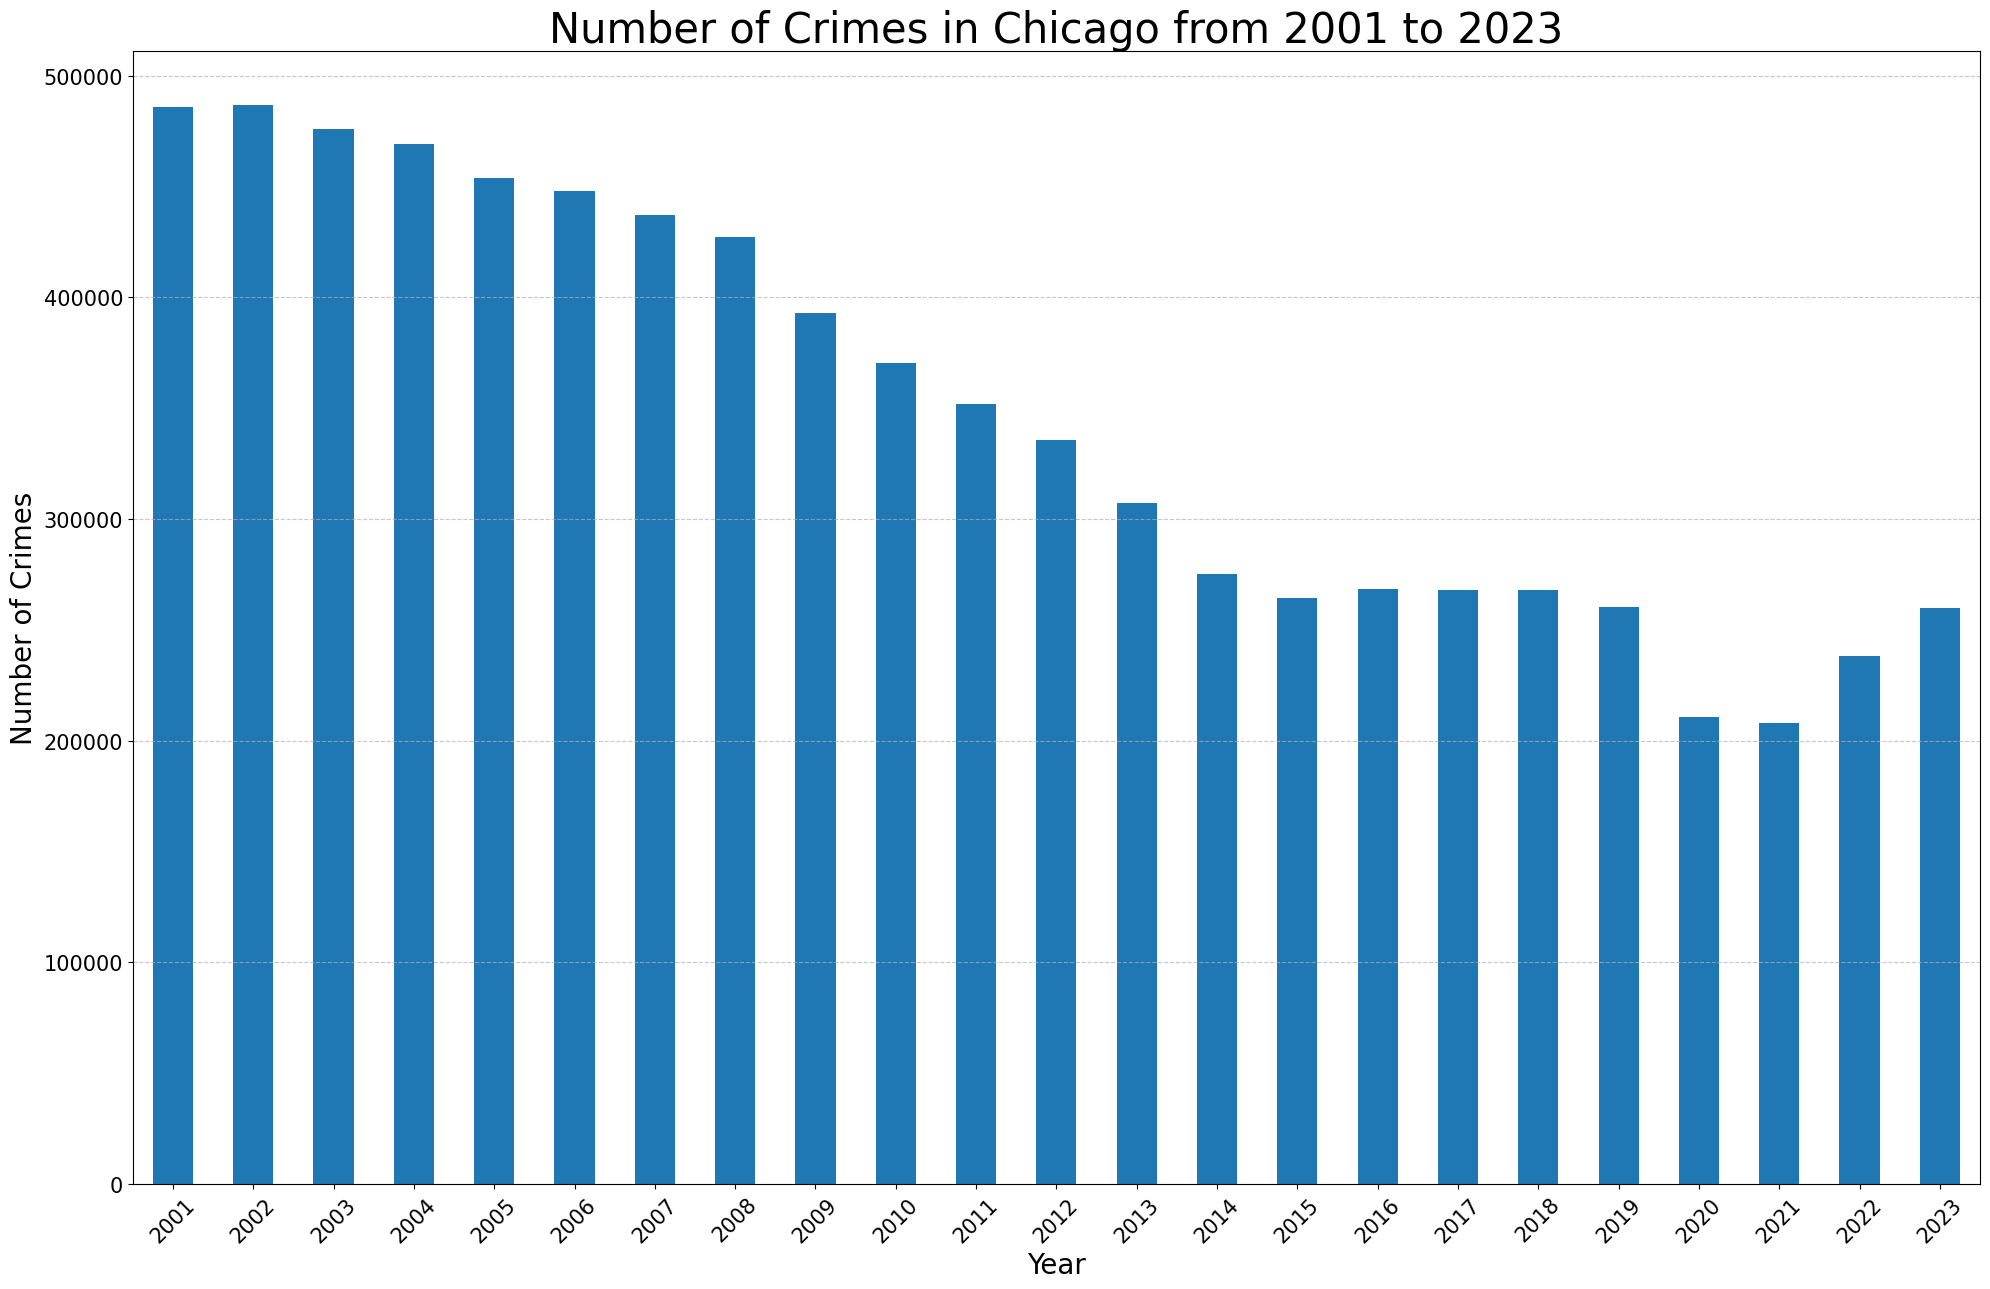

In [ ]:
# Count the number of crimes per year
crime_counts_per_year = chicago_crime_df['Year'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(20, 13))
crime_counts_per_year.plot(kind='bar',fontsize = 15)
plt.title('Number of Crimes in Chicago from 2001 to 2023', fontsize = 30)
plt.xlabel('Year',fontsize = 20)
plt.ylabel('Number of Crimes',fontsize = 20)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

5. **Number of crimes by month**

how many records we have for each month ?





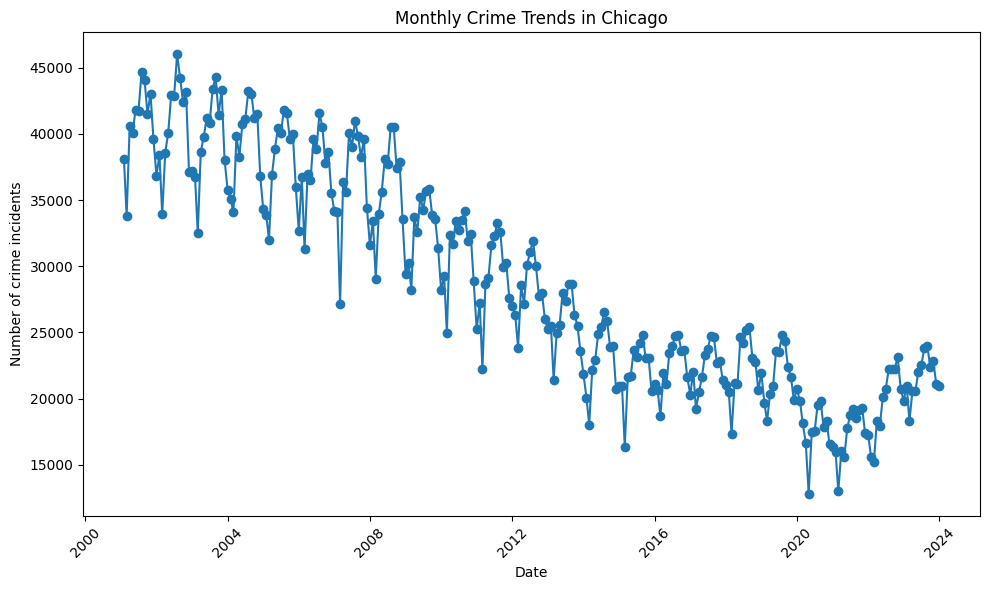

In [ ]:
# c_crime_df['Date'] = pd.to_datetime(c_crime_df['Date'])  # Convert date to DateTime64 [ns].

monthly_crime_count = c_crime_df.resample("M"  , on = 'Date').size()

# Create a line plot.

plt.figure(figsize = (10,6))
plt.plot(monthly_crime_count.index , monthly_crime_count.values , marker = 'o')
plt.xlabel("Date")
plt.ylabel("Number of crime incidents")
plt.title("Monthly Crime Trends in Chicago")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()


Observation:

1. The crime rate is dropping overall.
2. In 2000s,number of crime incidents were close to 40k.
3. In 2024 ,it's estimate to be 10k , so it's a major drop in crime.

This chart clearly shows a "periodic" pattern in the crimes over many years, which shows why crimes are very predictable activity.

6. **Top 10 - Number of cases each day**

In [ ]:
# Top 10 - Number of cases each day?

top_10_num_of_cases_each_day = c_crime_df.groupby(['Date'])['Case Number'].count().reset_index(name = 'no_of_cases').set_index('no_of_cases').sort_index(ascending = False)[:10]
top_10_num_of_cases_each_day

,Date
no_of_cases,
305,2008-01-01 00:01:00+00:00
259,2007-01-01 00:01:00+00:00
226,2006-01-01 00:01:00+00:00
218,2004-01-01 00:00:00+00:00
215,2005-01-01 00:01:00+00:00
213,2003-01-01 00:01:00+00:00
210,2003-01-01 00:00:00+00:00
205,2007-01-01 00:00:00+00:00
200,2015-01-01 00:01:00+00:00


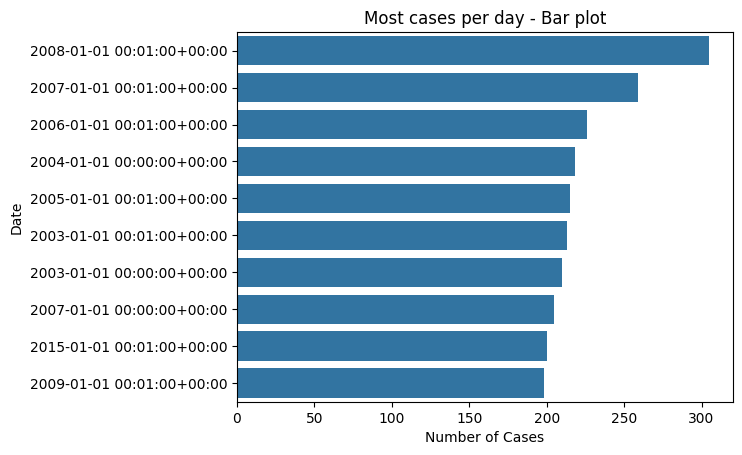

In [ ]:
top_10_num_of_cases_each_day_df = pd.DataFrame(top_10_num_of_cases_each_day)
index_df = top_10_num_of_cases_each_day_df.index

sns.barplot(x = index_df , y = 'Date' , data = top_10_num_of_cases_each_day_df)
plt.title("Most cases per day - Bar plot")
plt.xlabel("Number of Cases")
plt.ylabel("Date")
plt.show()

Observation: The average Number of cases per day could be more than 550

7. __Number of crime by type__</br>
We try to indentify the trend and highpoints or lowpoints.

In [ ]:
# Function to plot the serie value_counts
def plot_counts(serie, title):
    df = pd.DataFrame(serie.value_counts()[:15])
    df.columns = ["Freq"]
    df["Type"] = df.index
    fig = px.bar(df, y="Freq", x="Type", text="Freq", color="Freq", color_continuous_scale=px.colors.sequential.Blugrn)
    fig.update_traces(texttemplate="%{text:.2s}", textposition="outside")
    fig.update_layout(uniformtext_minsize=8, uniformtext_mode="hide")
    fig.update_layout(title_text=title)
    fig.show()


plot_counts(c_crime_df["Primary Type"], "Type of Crimes")

Observation: THEFT, BATTERY, CRIMINAL DAMAGE and NARCOTICS represents more the 65% of the crimes.

8. __Where does crimes happens the most?__

In [ ]:
plot_counts(c_crime_df["Location Description"], "Location of Crimes")

Crime happens mostly on the street

9. __Number of crimes per Year x Months__ </br>
Let's see the number of crimes per Year and Months...

In [ ]:
# first we convert the date column to datetime data type.

c_crime_df['Date'] = pd.to_datetime(chicago_crime_df['Date'],format = "%m/%d/%Y %I:%M:%S %p")
c_crime_df.set_index("Date", inplace=True)

In [ ]:
cases = pd.DataFrame(c_crime_df.resample("M").size(), columns=["Number of cases"])
cases["Month"] = cases.index.month.astype(str)
cases["Year"] = cases.index.year.astype(str)
cases["Year-Month"] = cases["Year"].str.cat(cases["Month"].str.zfill(2), sep="-")
cases.head()

,Number of cases,Month,Year,Year-Month
Date,,,,
2001-01-31,38122,1,2001,2001-01
2001-02-28,33789,2,2001,2001-02
2001-03-31,40568,3,2001,2001-03
2001-04-30,40091,4,2001,2001-04
2001-05-31,41839,5,2001,2001-05


BY HEATMAP

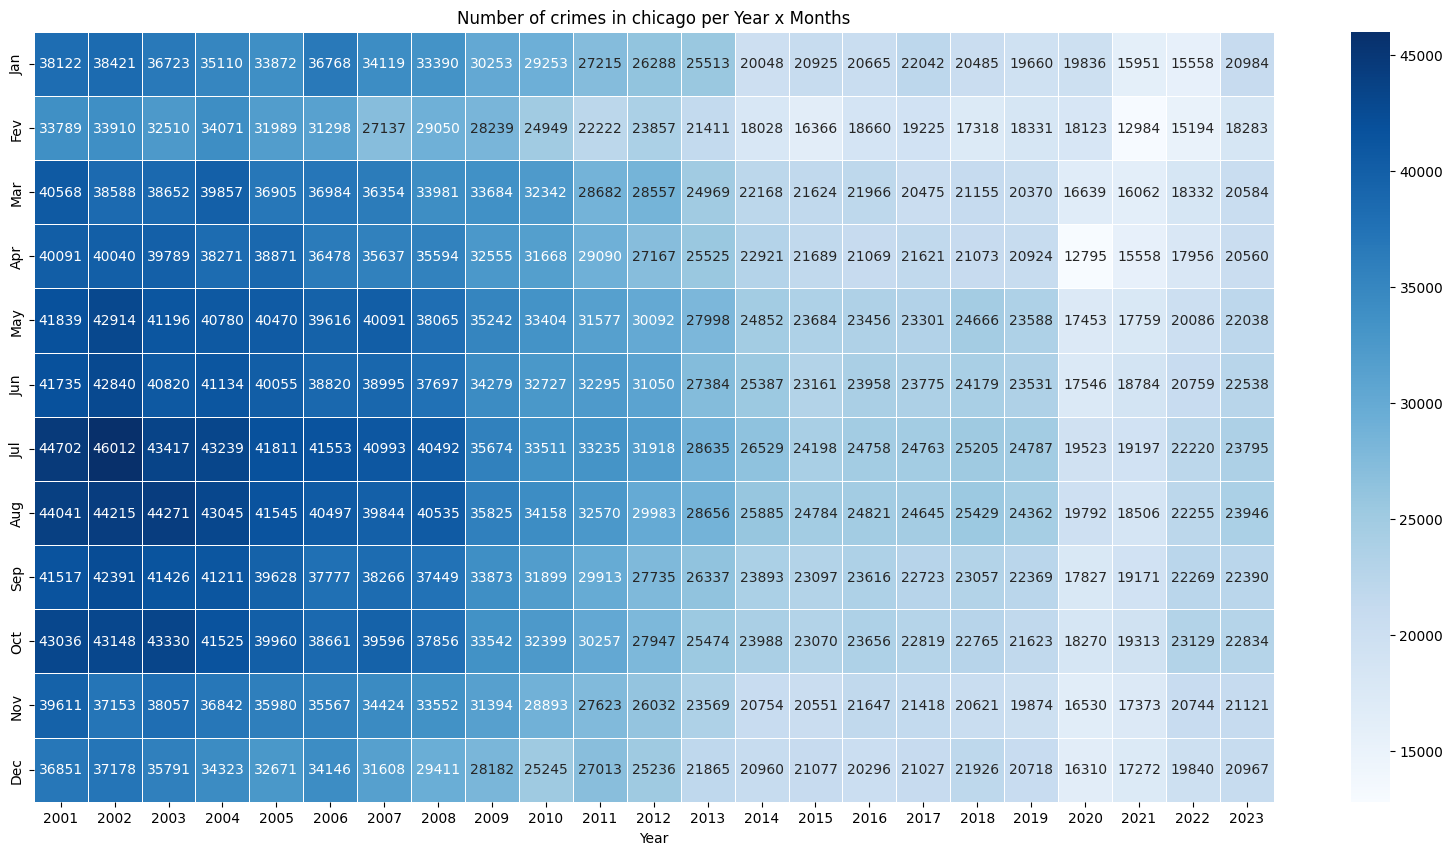

In [ ]:
case_table = cases[["Month", "Year", "Number of cases"]]
case_table  = case_table.pivot(index='Month', columns='Year', values='Number of cases').fillna(0).astype(int)
case_table.index = case_table.index.astype(int)
case_table = case_table.sort_index()
case_table.index = ['Jan', 'Fev', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.figure(figsize=(20, 10))
_ = sns.heatmap(
    case_table,
    annot=True,
    fmt="d",
    linewidths=0.5,
    cmap="Blues",
).set_title('Number of crimes in chicago per Year x Months')

The years between 2001 and 2012 were a tough time, the year 2008 was the worst with a mean of 71004 crimes per month, and the best year was the 2015 with a mean of 21916 crimes per month.

BY BAR

In [ ]:
fig = px.bar(
    cases,
    x="Year-Month",
    y="Number of cases",
    hover_data=["Year", "Month", "Number of cases"],
    color="Number of cases",
    height=600,
    width=1400,
    color_continuous_scale=px.colors.sequential.Blugrn

)
fig.update_layout(title_text='Crime counts per year-month in bars')
fig.show()

Similar graph but using bars to visualize though noisy but can be used. Again the 'tough time' during 2001 until 2012.

10. **Are there specific location that crimes used to happen?**

Using Map plot

In [ ]:
map_marks = chicago_crime_df[['Latitude', 'Longitude']]
map_marks['Year'] =  pd.to_datetime(chicago_crime_df.Date, format="%m/%d/%Y %I:%M:%S %p").dt.year
map_marks.head()

<ipython-input-67-a2bb474e3525>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Latitude,Longitude,Year
0,41.877865,-87.627701,2015
1,41.918940,-87.751554,2018
3,41.960001,-87.718493,2018
4,41.706990,-87.655547,2014
5,41.748086,-87.629434,2018


In [ ]:
fig = px.scatter_mapbox(map_marks[map_marks.Year == 2016].sample(5000), lat="Latitude", lon="Longitude",
                        color_discrete_sequence=["fuchsia"], zoom=9, height=650)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

Look like there is crime everywhere in Chicago, in the centre, you can see more points but also is a crowded place.

11. **What is the arrested rate per crime?**

In [ ]:
cases = c_crime_df.groupby('Primary Type')['Arrest'].mean().reset_index()
cases['Arrest (%)'] = cases['Arrest'].round(4)*100
cases.sort_values('Arrest', inplace=True)
fig = px.bar(
    cases,
    orientation='h',
    x="Arrest (%)",
    y="Primary Type",
    color="Arrest (%)",
    text="Arrest (%)",
    height=800,
    #width=800,
        color_continuous_scale=px.colors.sequential.Blugrn

)
fig.update_traces(texttemplate="%{text:.4s}", textposition="outside")
fig.update_layout(title_text="Arrested Rate in % per Type Crime in Chicago.")

fig.show()

The “VIOLATION” crimes look strongly correlated to the arrested rate once the 'cop' must be present in the location to declare the violation.

12. **Top 10 Block with the most crime**

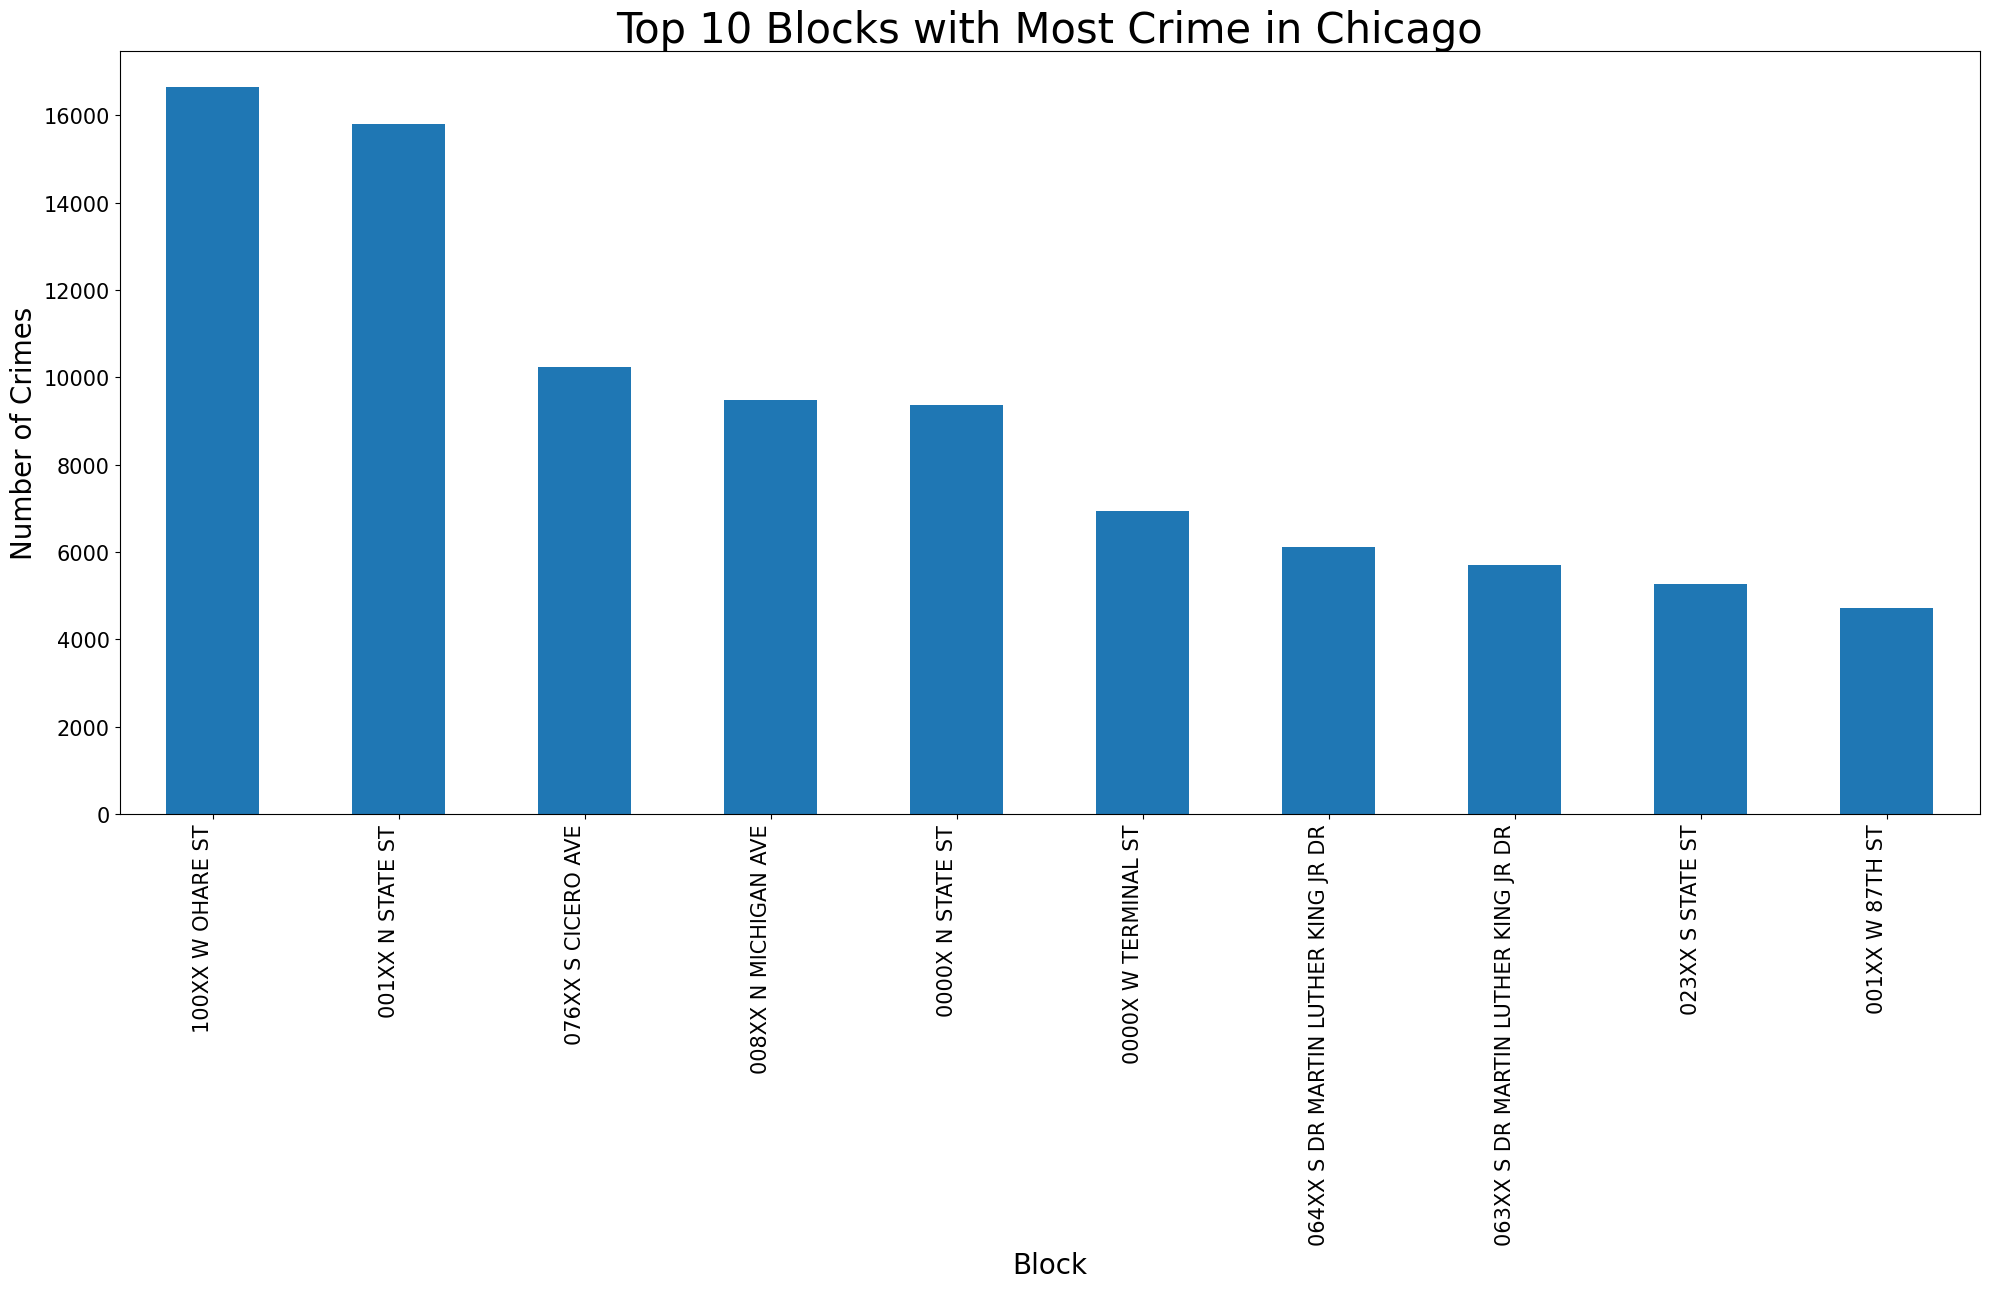

In [ ]:
# Group the data by 'Block' and count occurrences
block_counts = chicago_crime_df['Block'].value_counts()

# Select the top 10 blocks with the most crimes
top_10_blocks = block_counts.head(10)

# Plot the top 10 blocks
top_10_blocks.plot(kind='bar', figsize = (20,13), fontsize = 15)
plt.title('Top 10 Blocks with Most Crime in Chicago',fontsize=30)
plt.xlabel('Block', fontsize=20)
plt.ylabel('Number of Crimes',fontsize=20)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

13. **Top - 10 Ward with most amount of crimes**

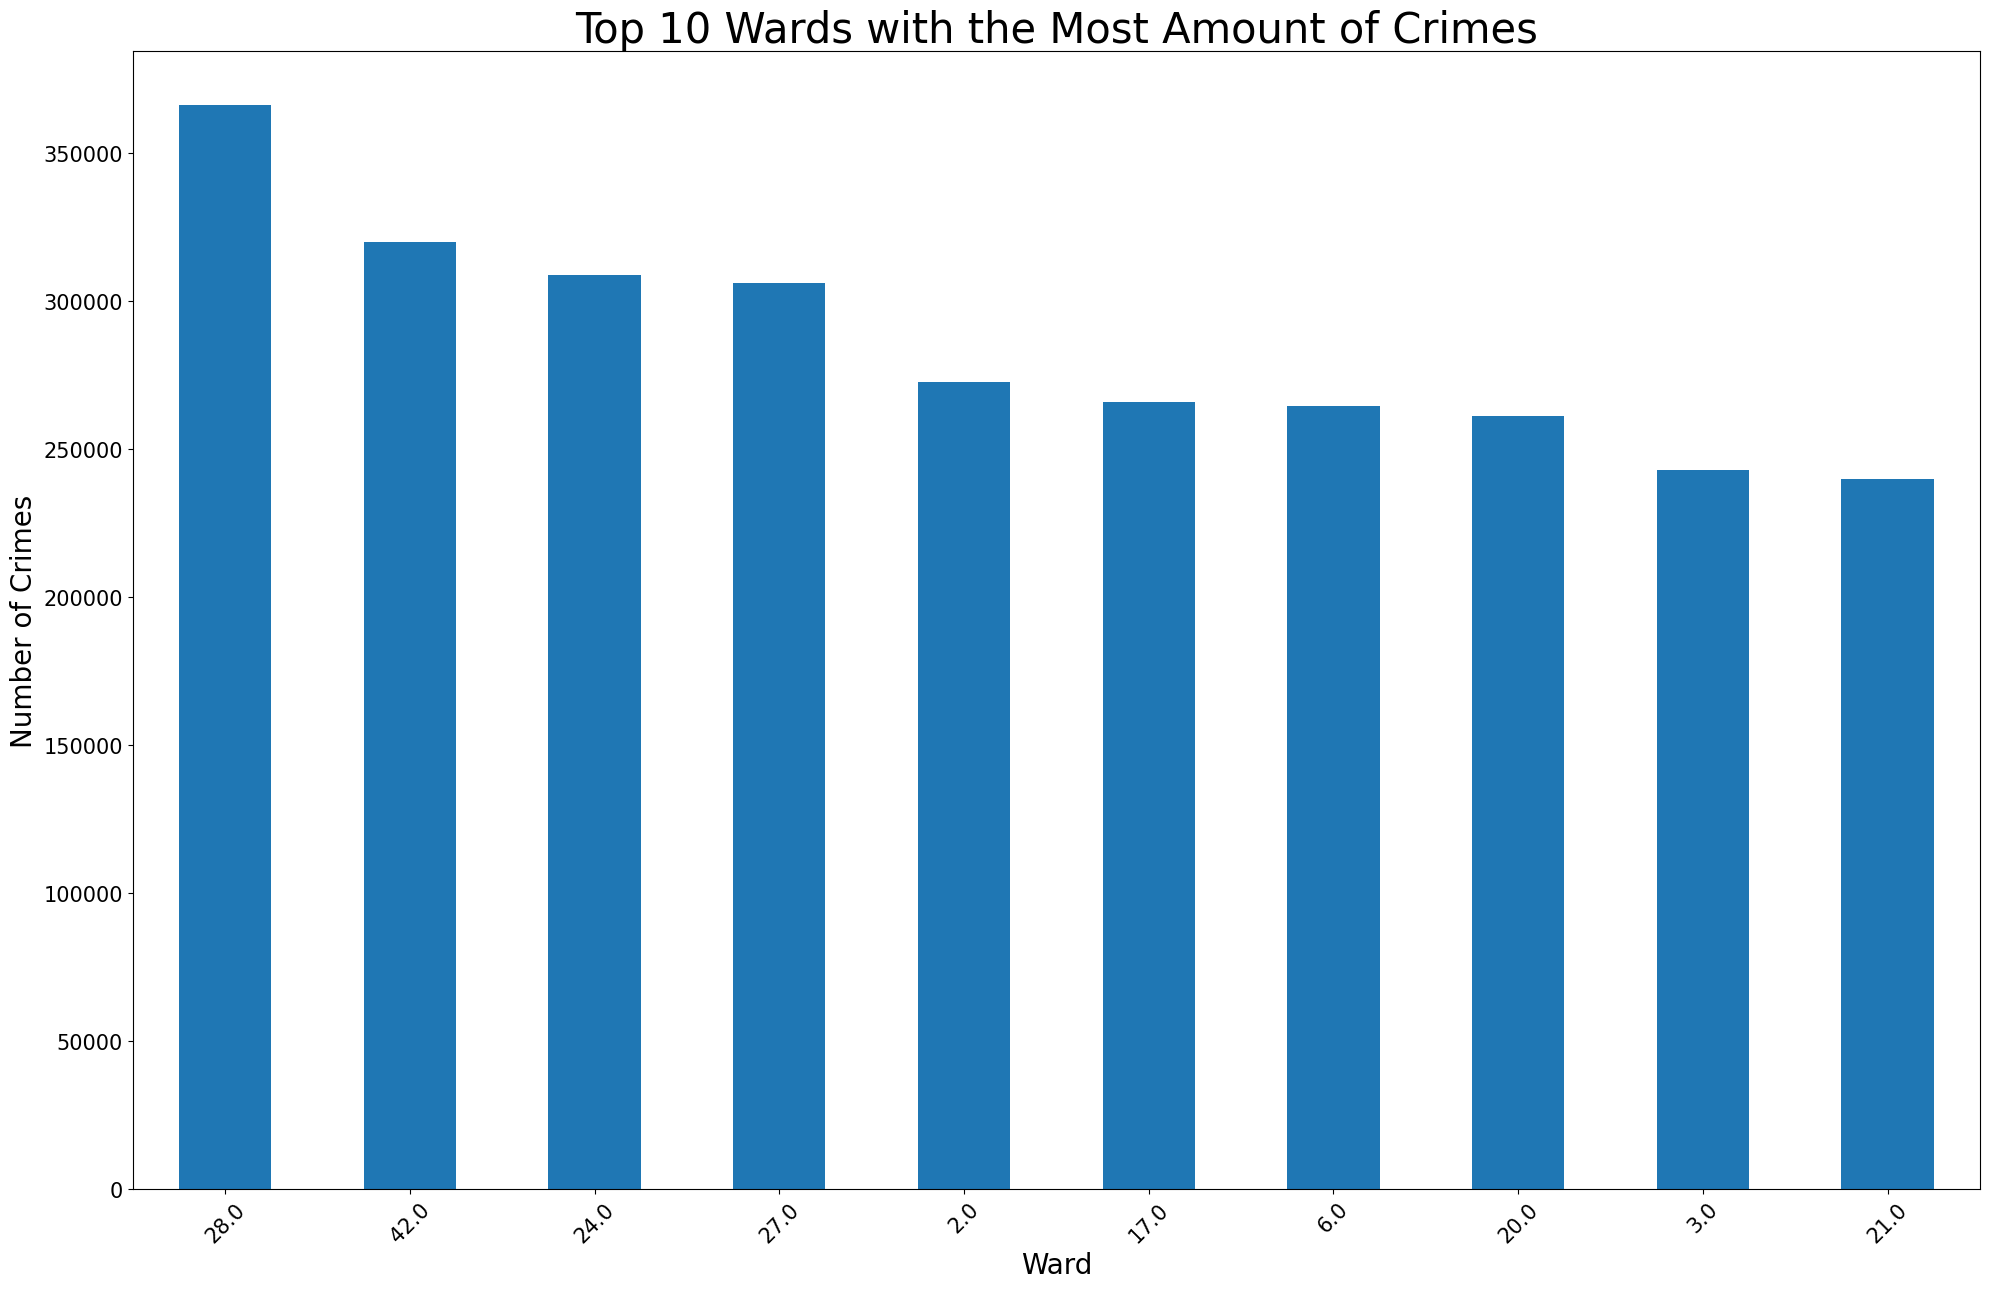

In [ ]:
# Group by 'Ward' and count the occurrences of crimes in each ward
ward_crime_counts = chicago_crime_df['Ward'].value_counts()

# Select the top 10 wards
top_10_wards = ward_crime_counts.head(10)

# Plot the data
top_10_wards.plot(kind='bar', figsize = (20,13), fontsize = 15)
plt.title('Top 10 Wards with the Most Amount of Crimes', fontsize = 30)
plt.xlabel('Ward', fontsize = 20)
plt.ylabel('Number of Crimes', fontsize = 20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

14. **Top - 10 community area with the most amount of crimes**




<ipython-input-72-f8bb2fcc320d>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




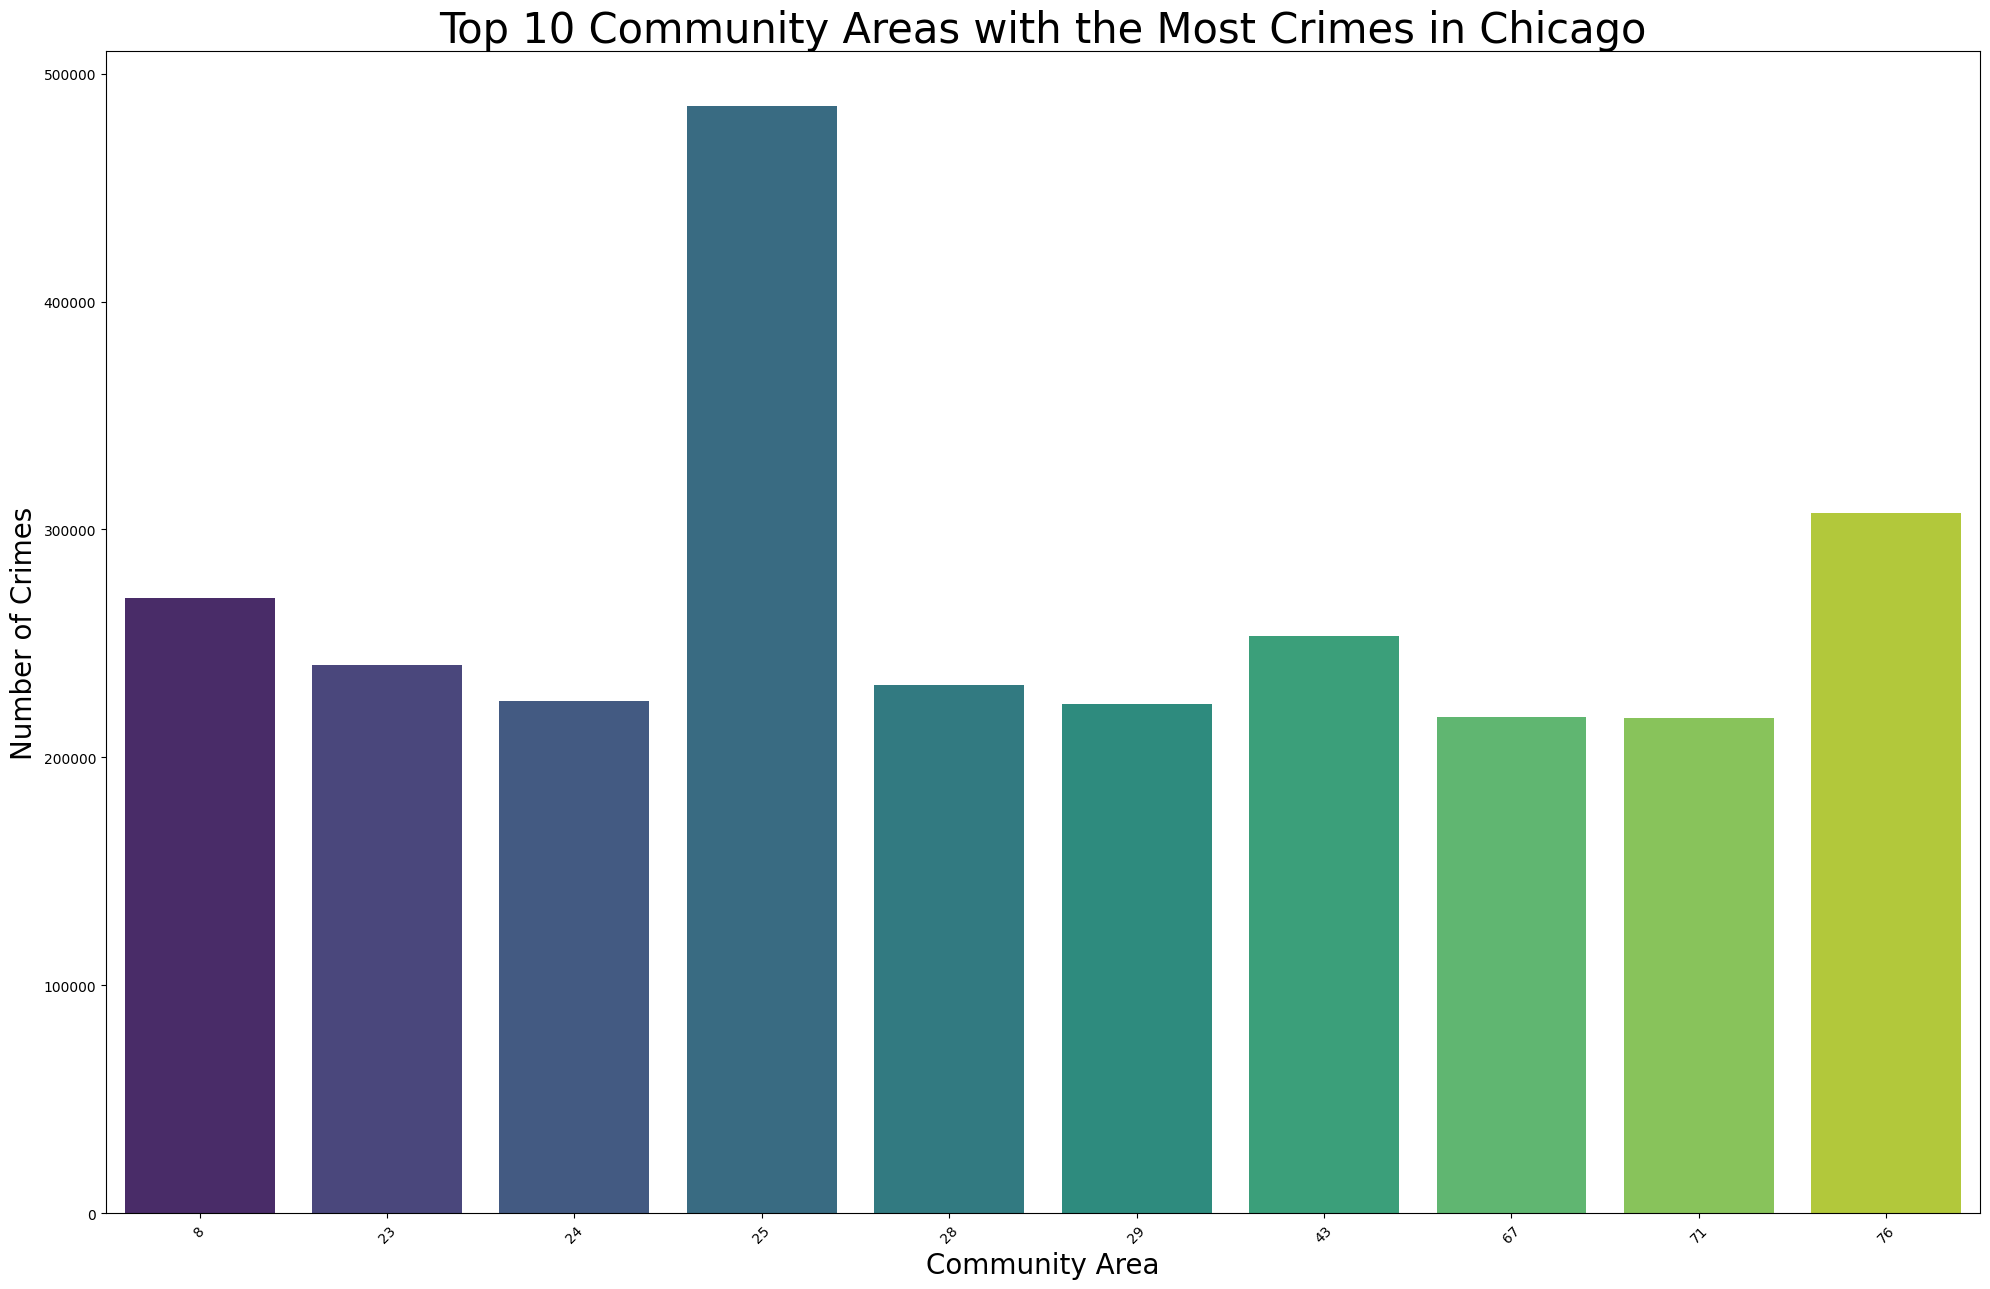

In [ ]:
# Group the data by community area and count the number of crimes
community_crime_count = c_crime_df['Community Area'].value_counts().reset_index()
community_crime_count.columns = ['Community Area', 'Crime Count']

# Sort the data to find the top 10 community areas with the most crimes
top_10_community_crime = community_crime_count.head(10)

# Visualize the top 10 community areas with the most crimes
plt.figure(figsize=(20, 13))
sns.barplot(x='Community Area', y='Crime Count', data=top_10_community_crime, palette='viridis')
plt.title('Top 10 Community Areas with the Most Crimes in Chicago', fontsize = 30)
plt.xlabel('Community Area',fontsize = 20)
plt.ylabel('Number of Crimes', fontsize = 20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

15. **Top - 10 communities with the most crime in 2023**

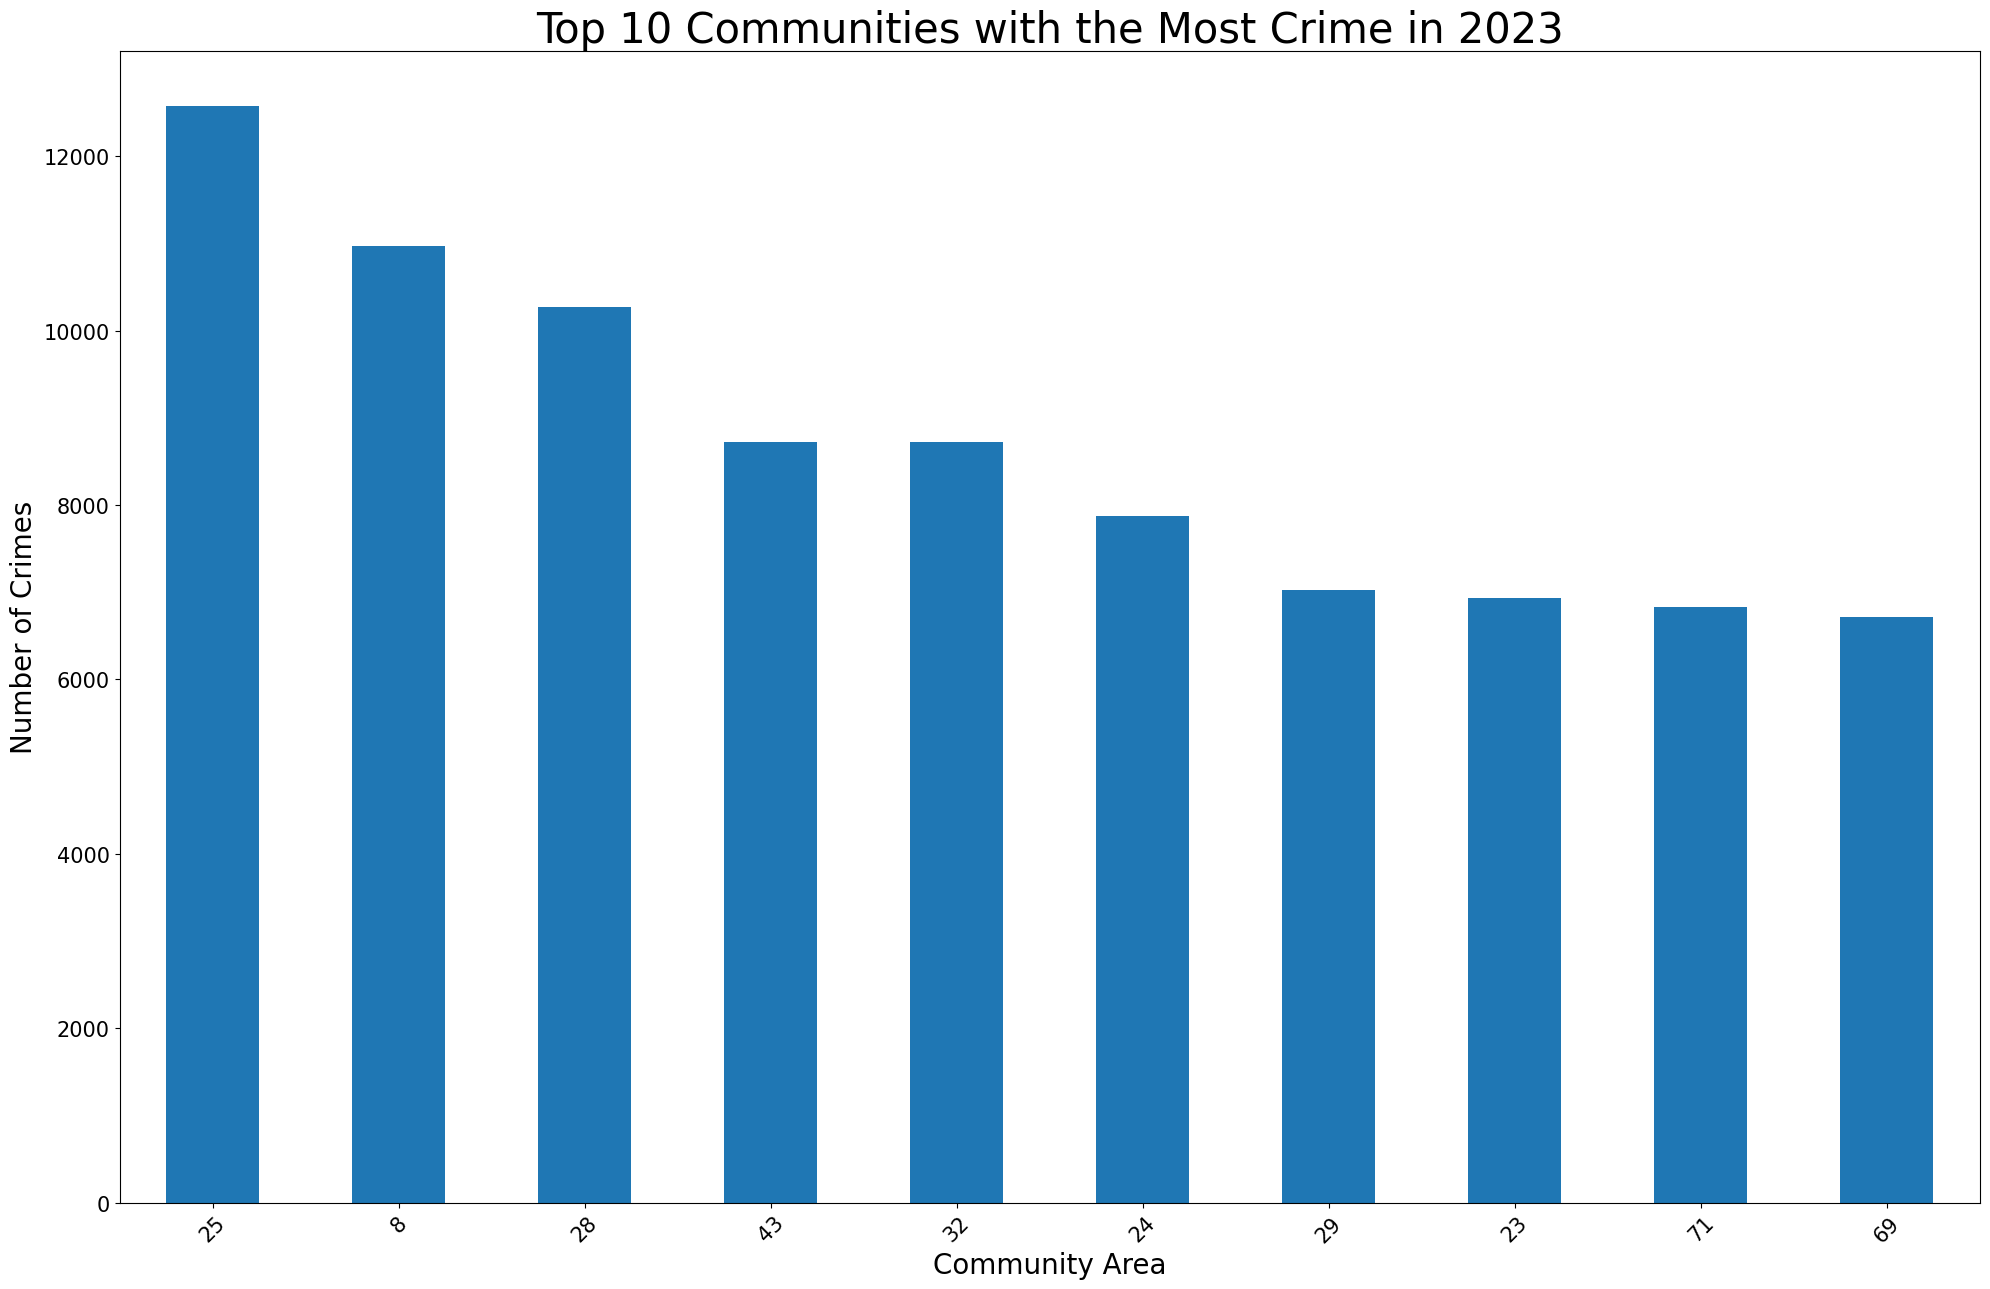

In [ ]:
# Filter the dataset for the year 2023
chicago_crime_2023 = c_crime_df[c_crime_df['Year'] == 2023]

# Group by community and count the number of crimes
crime_by_community = chicago_crime_2023['Community Area'].value_counts().sort_values(ascending=False)

# Select the top 10 communities with the most crime
top_10_communities = crime_by_community.head(10)

# Plot the top 10 communities with the most crime
plt.figure(figsize=(20, 13))
top_10_communities.plot(kind='bar', fontsize = 15)
plt.title('Top 10 Communities with the Most Crime in 2023', fontsize = 30)
plt.xlabel('Community Area',fontsize = 20)
plt.ylabel('Number of Crimes',fontsize = 20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

16. **Top - 10 Location  where theft normally occurs**

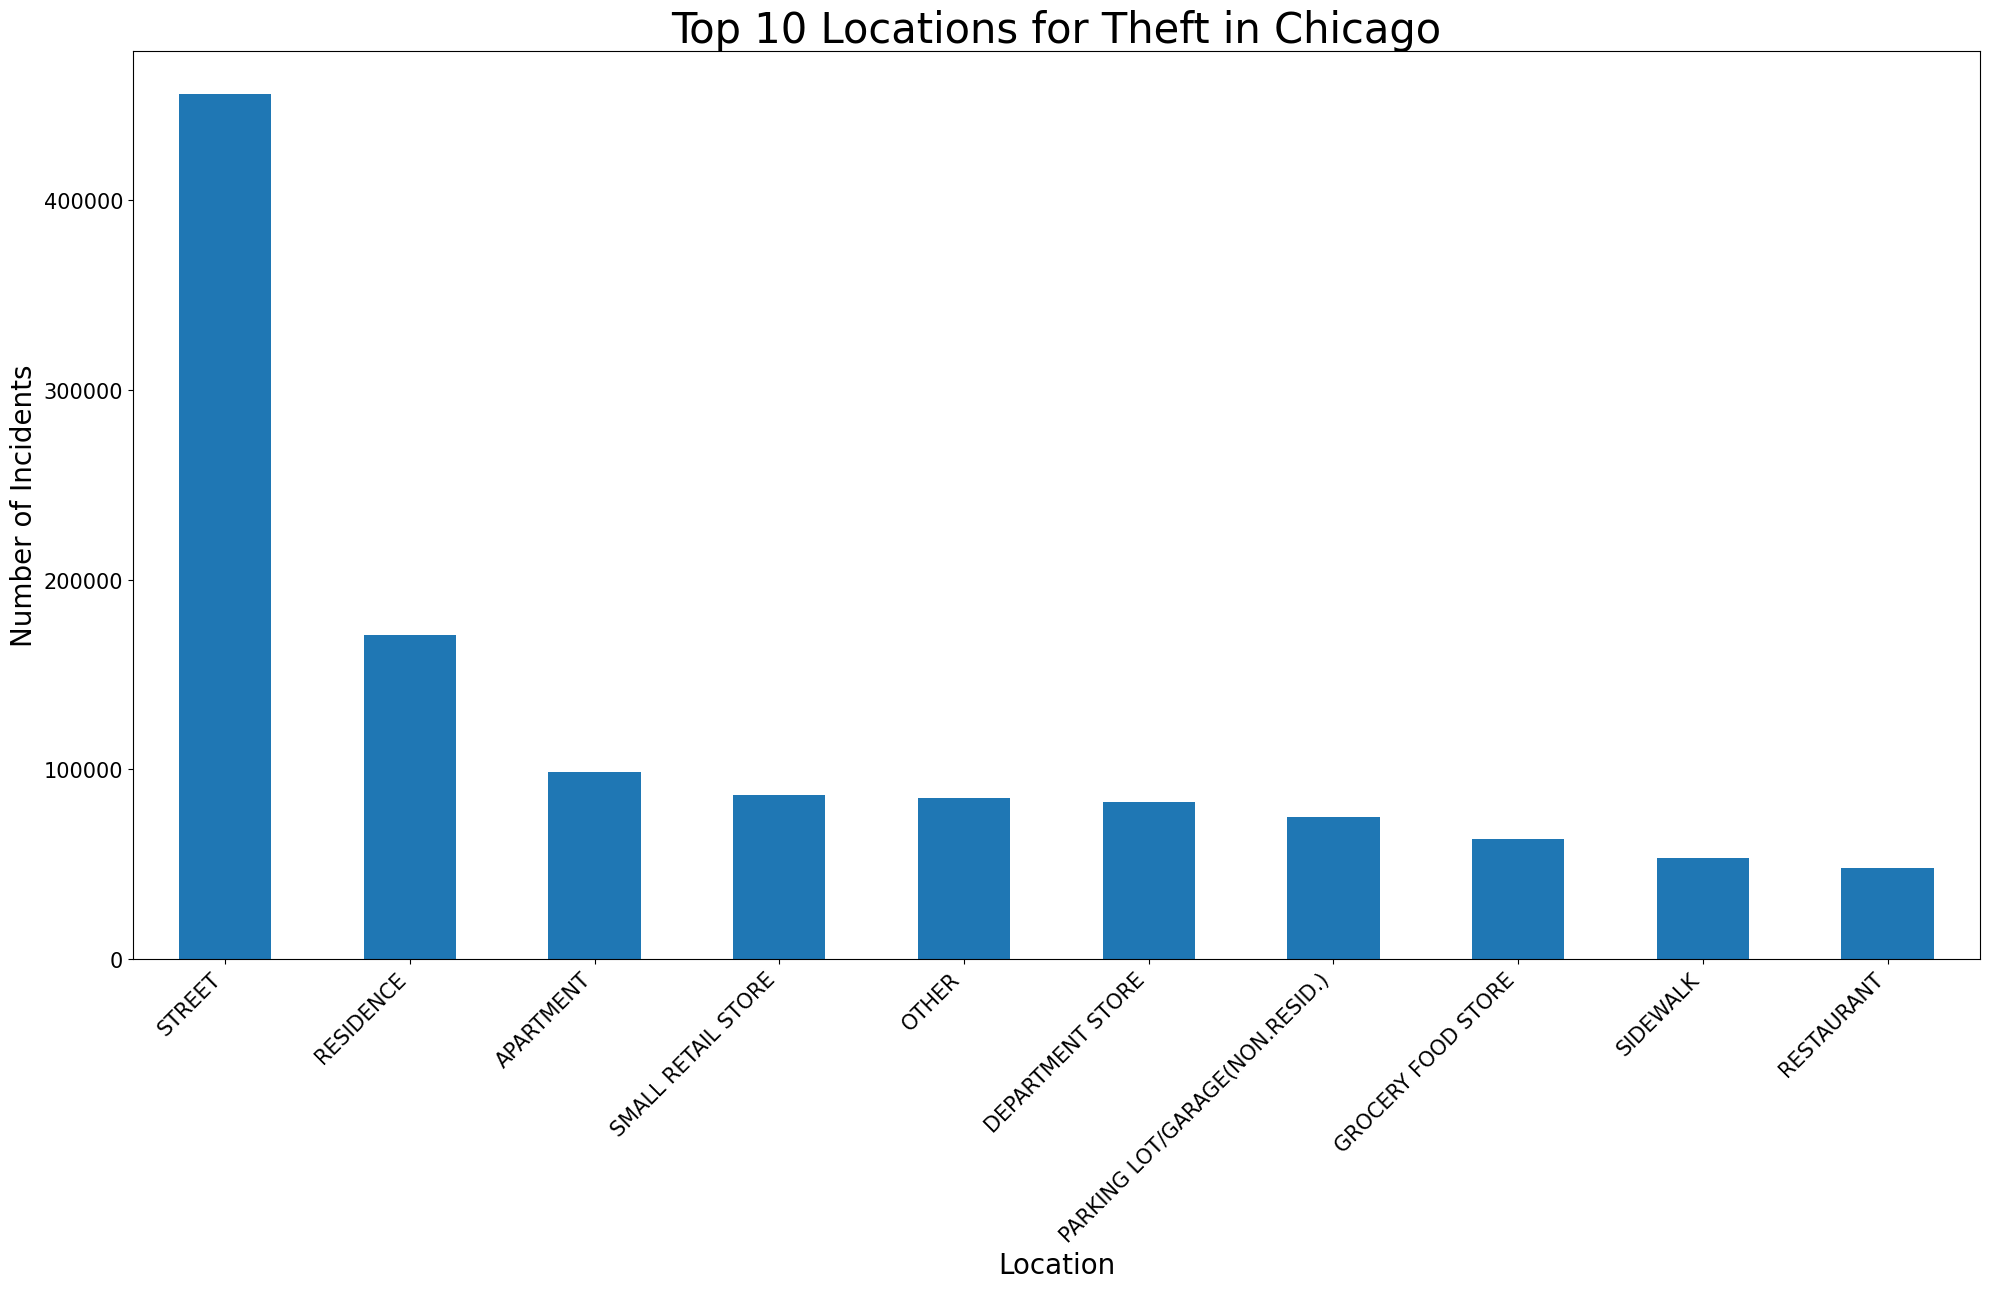

In [ ]:
# Filter the dataset to include only theft-related incidents
theft_df = chicago_crime_df[chicago_crime_df['Primary Type'] == 'THEFT']

# Count the occurrences of theft incidents at each location
theft_locations_count = theft_df['Location Description'].value_counts()

# Get the top 10 locations
top_10_theft_locations = theft_locations_count.head(10)

# Plot the top 10 theft locations
plt.figure(figsize=(20, 13))
top_10_theft_locations.plot(kind='bar',fontsize = 15)
plt.title('Top 10 Locations for Theft in Chicago',fontsize = 30)
plt.xlabel('Location',fontsize = 20)
plt.ylabel('Number of Incidents', fontsize = 20)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

17. **Top-15 crime where arrest occured**

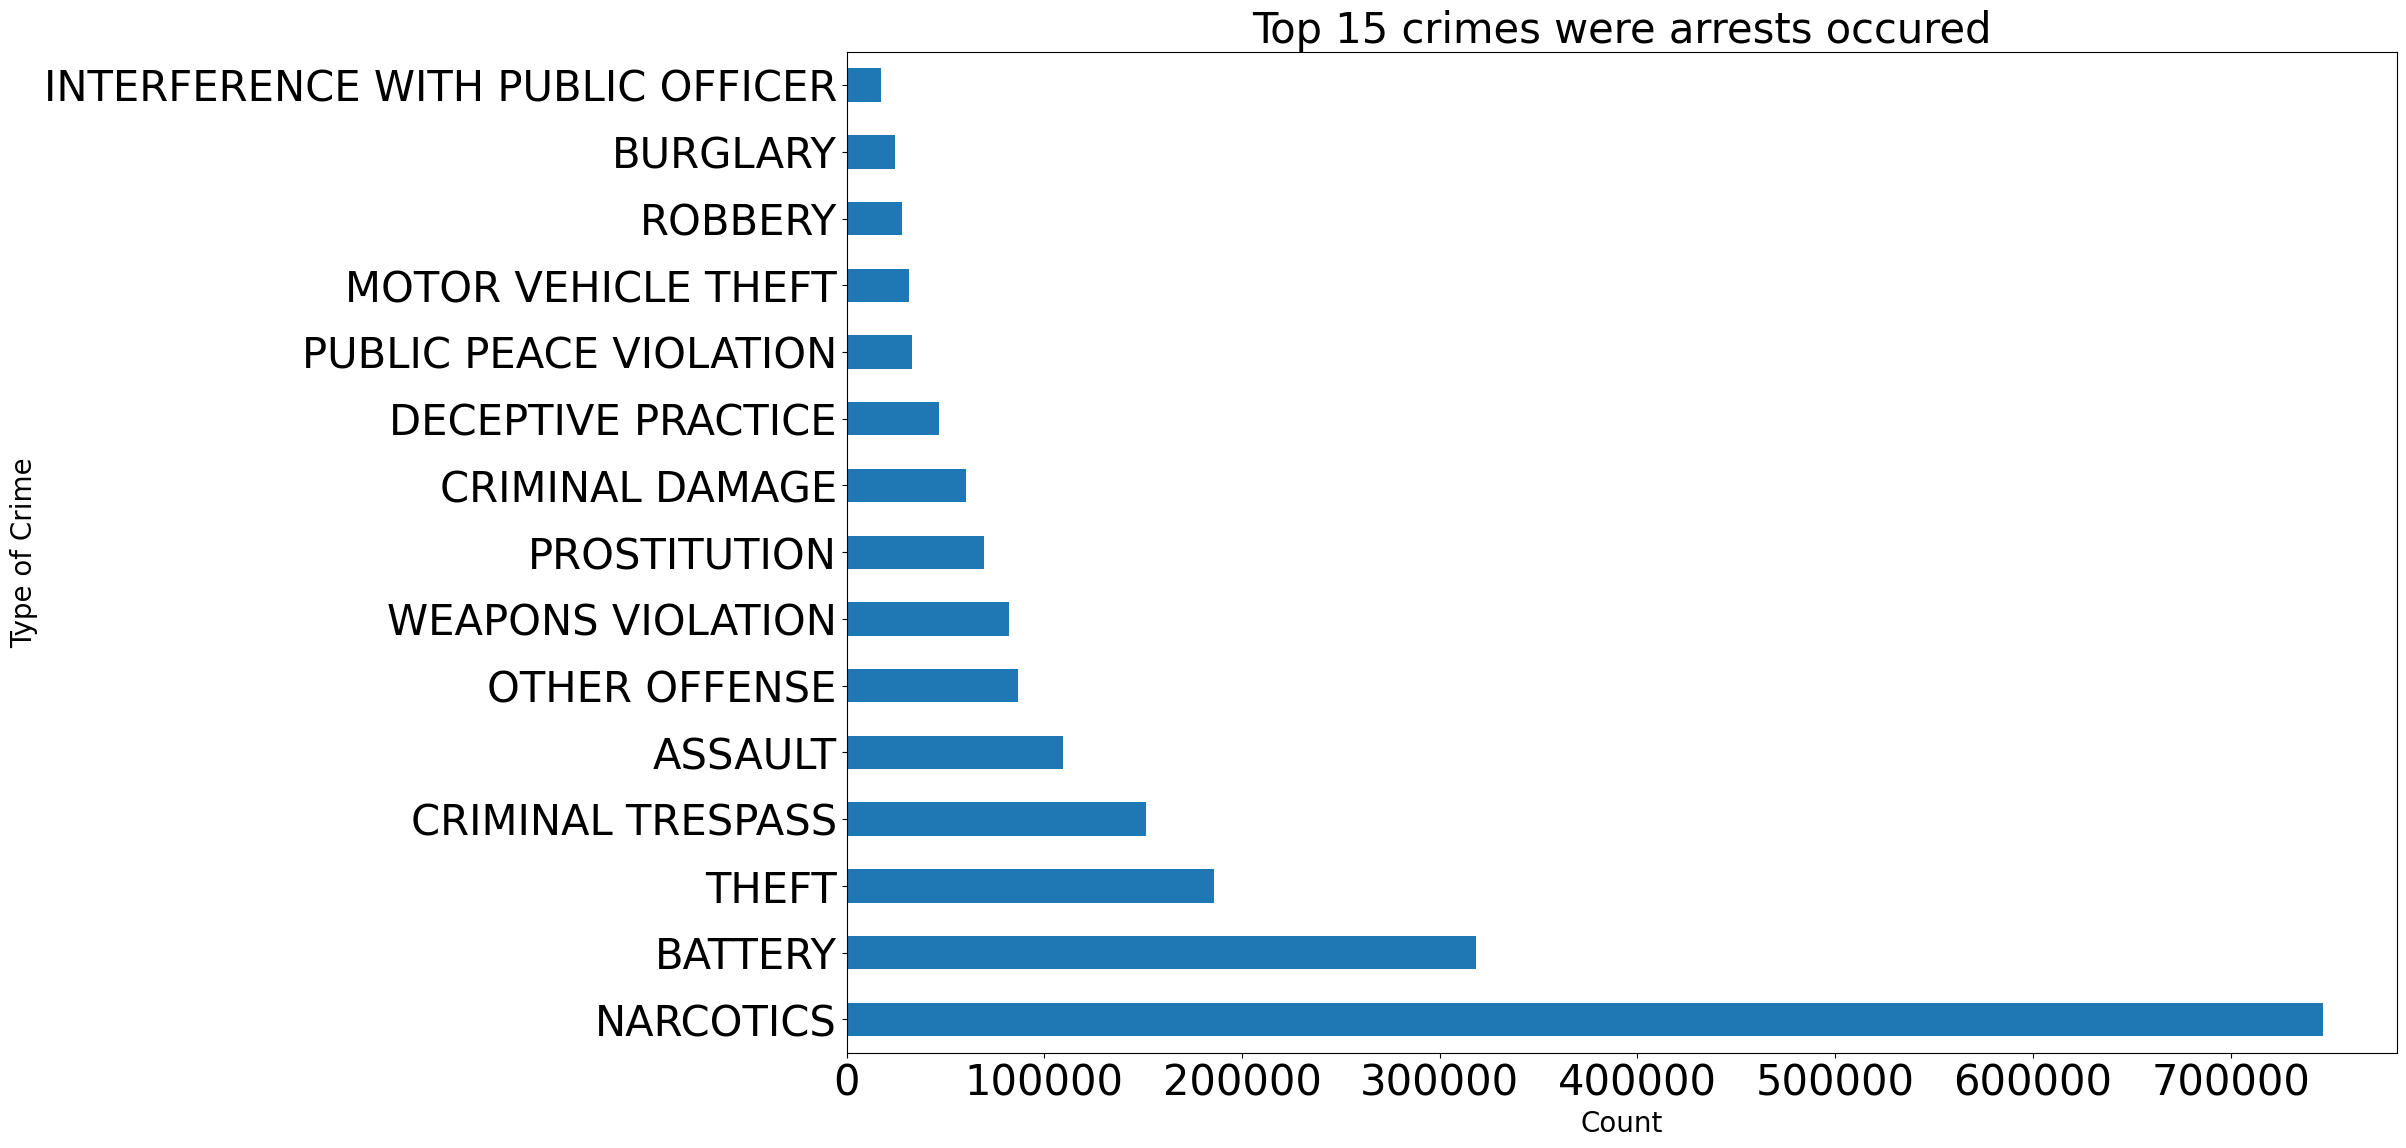

In [ ]:
ax = c_crime_df[c_crime_df['Arrest'] == True].value_counts("Primary Type")[:15]\
    .plot(kind = 'barh',
          figsize = (20,13),
          fontsize = 30)
ax.set_ylabel("Type of Crime", fontsize=20)
ax.set_xlabel("Count", fontsize=20)
ax.set_title("Top 15 crimes were arrests occured", fontsize=30)
plt.show()
